In [1]:
from time import time
from os import getenv
import pandas as pd

# Loading AWS Credentials

Here we use the `python-dotenv` library to load our AWS access credentials from a `.env` file contained
in the same folder with our notebooks. iPython magic commands are used here. Keep in mind
if you already have AWS credentials in your environment variables the `.env` will be ignored.

If you already have different credentials and you want to load from the `.env` file, change `%dotenv` magic
function to `%dotenv -o` which will override the existing credentials.

After we load environment variables, we put them in a format that `pandas` expects.

In [2]:
%load_ext dotenv
%dotenv

region_name = 'us-east-1'
aws_key = getenv('AWS_ACCESS_KEY_ID')
aws_secret = getenv('AWS_SECRET_ACCESS_KEY')

s3_options = {
    'client_kwargs': {
        'aws_access_key_id': aws_key,
        'aws_secret_access_key': aws_secret,
        'region_name': region_name,
        }
    }

# Reading Cloud Horizons into Pandas DataFrame
With the configuration above, now we can use the built in `pandas.read_csv()`
function to download and parse the `*.csv` files into `pandas.DataFrame()`.

Then we may or may not combine them into a single `pandas.DataFrame()`. In this example we do
by calling `pandas.concat` function.

In [3]:
s3_bucket_hrz = 's3://geophysics-on-cloud/poseidon/horizons/'
horizons = ['water_bottom', 'top_heywood', 'top_johnson', 'top_jameison', 'top_near_plover']

start_time = time()

all_horizons = []
for horizon in horizons:
    all_horizons.append(
        pd.read_csv(
            filepath_or_buffer=s3_bucket_hrz + f'{horizon}.csv.gz',
            index_col=[0, 1],
            compression='gzip',
            storage_options=s3_options)
    )

all_horizons = pd.concat(all_horizons, axis=1)

print(f"Completed read in {time() - start_time:.2f} seconds")

C:\Users\tasan\miniconda3_py38_4.9.2\envs\geoml_competitions\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Completed read in 19.17 seconds


# Data Description
We can look at the raw data:

In [4]:
all_horizons

water_bottom  top_heywood  top_johnson  top_jameison  \
inline xline                                                         
1080   1080          581.9       2058.3       2346.8        2719.2   
       1081          581.8       2058.3       2346.8        2719.3   
       1082          581.8       2058.4       2347.1        2719.5   
       1083          581.8       2058.4       2347.3        2719.7   
       1084          581.8       2058.4       2347.6        2720.0   
...                    ...          ...          ...           ...   
3700   3196          648.1       2062.7       2493.0        2633.7   
       3197          648.2       2062.7       2493.0        2633.7   
       3198          648.2       2062.7       2492.9        2633.6   
       3199          648.2       2062.7       2492.9        2633.6   
       3200          648.2       2062.7       2492.9        2633.6   

              top_near_plover  
inline xline                   
1080   1080            3327.9  
       1081            3327.8  
       1082            3327.8  
       1083            3327.8  
       1084            3327.7  
...                       ...  
3700   3196            3985.7  
       3197            3985.1  
       3198            3984.5  
       3199            3983.9  
       3200            3983.3  

[5559141 rows x 5 columns]

Get some statistics:

In [5]:
all_horizons.describe()

,water_bottom,top_heywood,top_johnson,top_jameison,top_near_plover
count,5.559141e+06,5.559141e+06,5.559141e+06,5.559141e+06,5.559141e+06
mean,6.383200e+02,2.037907e+03,2.461852e+03,2.729175e+03,3.360496e+03
std,3.129056e+01,4.665124e+01,1.167919e+02,8.732290e+01,2.722061e+02
min,5.792000e+02,1.933000e+03,2.241500e+03,2.545700e+03,2.842800e+03
25%,6.121000e+02,2.007300e+03,2.367200e+03,2.677600e+03,3.224600e+03
50%,6.349000e+02,2.035000e+03,2.440000e+03,2.713800e+03,3.282800e+03
75%,6.604000e+02,2.067700e+03,2.549300e+03,2.766400e+03,3.372400e+03
max,7.261000e+02,2.177200e+03,2.780500e+03,3.096800e+03,4.436900e+03


If we want to query a particular horizon we can use brackets.

This is regular `pandas` syntax.

In [6]:
all_horizons[['water_bottom']]

water_bottom
inline xline              
1080   1080          581.9
       1081          581.8
       1082          581.8
       1083          581.8
       1084          581.8
...                    ...
3700   3196          648.1
       3197          648.2
       3198          648.2
       3199          648.2
       3200          648.2

[5559141 rows x 1 columns]

If we want to query a range of horizons (i.e. seismic minicube equivalent) we can use
the `IndexSlice` convenience function from `pandas`.

In this example, we query inlines from 2100 to 2102, and crosslines from 2500 to 2502.

In [7]:
slicer = pd.IndexSlice
all_horizons.loc[slicer[2100:2102, 2500:2502], :]

water_bottom  top_heywood  top_johnson  top_jameison  \
inline xline                                                         
2100   2500          662.1       2008.5       2531.0        2684.6   
       2501          662.1       2008.5       2531.0        2684.5   
       2502          662.1       2008.6       2530.9        2684.3   
2101   2500          662.1       2008.5       2530.6        2684.3   
       2501          662.1       2008.5       2530.5        2684.2   
       2502          662.1       2008.6       2530.4        2684.0   
2102   2500          662.1       2008.4       2530.2        2684.1   
       2501          662.1       2008.5       2530.1        2683.9   
       2502          662.1       2008.6       2530.0        2683.7   

              top_near_plover  
inline xline                   
2100   2500            3326.7  
       2501            3326.4  
       2502            3326.0  
2101   2500            3325.8  
       2501            3325.0  
       2502            3324.4  
2102   2500            3324.2  
       2501            3324.0  
       2502            3323.8

# Plotting Horizons

We decimate the horizons by 50 il/xls for faster plotting.

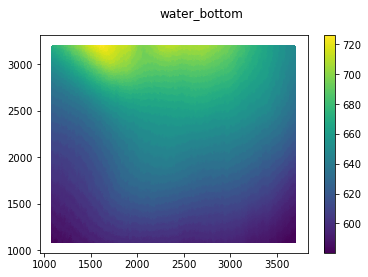

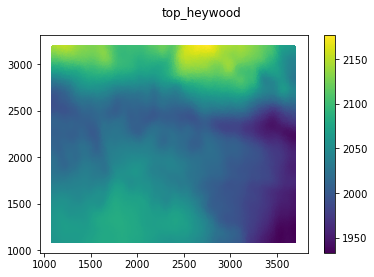

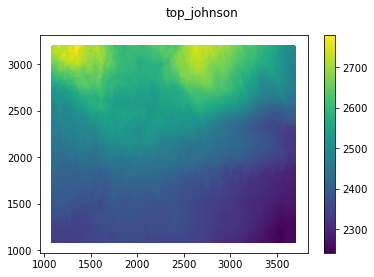

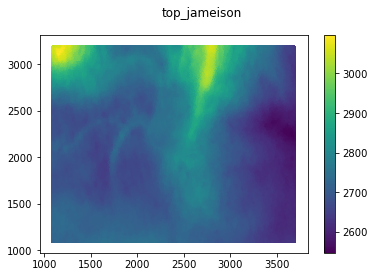

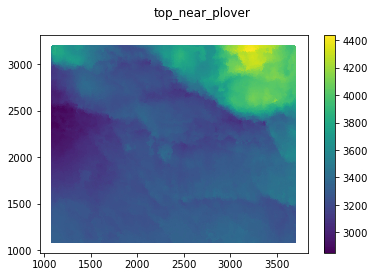

In [8]:
import matplotlib.pyplot as plt
for horizon in all_horizons.columns:
    plt.figure()
    plt.suptitle(horizon)
    hrz = all_horizons[horizon]
    plt.tripcolor(
        hrz.index.get_level_values(0)[::50],  # Inline Numbers (x)
        hrz.index.get_level_values(1)[::50],  # Crossline Numbers (y)
        hrz.values[::50],  # Horizon times
    )
    plt.colorbar()

